#### ```Importing Necessary Libraries```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

#### ```Loading the dataset and splitting into Train and Test sets```<br> 
##### We have used MetaboAnalyst to find the best features for the dataset using VIP Score > threshold. The dataset is then split into Train and Test sets.

In [2]:
# import the 1st sheet from the excel file 3groups-OSCC_PM_Normal.xlsx named as negative
negative = pd.read_excel(
    '../dataset/3groups-OSCC_PM_Normal.xlsx', sheet_name='Negative')
# make the fist row as the column header
negative.columns = negative.iloc[0]
negative = negative[1:]
print(negative.shape)
negative.head()

(1378, 42)


,Class,OSCC,PM,OSCC,Normal,OSCC,OSCC,OSCC,OSCC,PM,...,PM,OSCC,PM,OSCC,Normal,OSCC,PM,OSCC,Normal,Normal
1,MB_1,4607766.521329,7414787.857821,9628120.902191,7824878.181526,1135798.004792,5837771.762511,12953790.320535,13081629.764095,5491021.809737,...,7596023.519341,7183151.305047,9800027.80556,10491179.450834,9454027.346825,9054566.197321,12704073.324588,2441511.813587,11322466.005314,2970068.425688
2,MB_2,4081430.305285,9247972.650257,6605479.272243,1211856.61207,3602347.411082,7939803.586037,4444481.096285,6582823.099244,9160205.40773,...,5282380.877502,8212390.563877,13680301.623054,8016756.441982,10140499.525373,2878774.152414,8990933.314761,15246326.992798,9548978.528288,10117676.623793
3,MB_3,20448930.645811,40241265.902789,18488378.385889,19440158.410004,24289212.795935,68038156.615661,46533891.783735,8549495.683676,49870730.816324,...,16033930.190342,8739610.396054,10942511.017657,9678319.755449,101319627.120413,23529366.628332,36610574.814086,10974900.317516,30340771.056324,14018424.627491
4,MB_4,7130075.063141,3149666.52952,5370520.355939,10151942.228064,9179114.675876,10656050.564913,10483043.39533,14937947.377755,7790607.546368,...,18538692.504847,8593382.389242,17440733.886974,8400252.801416,11430792.730281,13575506.462289,16316839.852839,1167924.295275,14679321.31008,3864123.123504
5,MB_5,15487872.289505,10818910.941415,2395967.977354,5150316.529332,6191025.012966,6421967.659694,10099967.451989,6138653.786331,9396849.08483,...,7718826.159972,8819380.442754,10514955.033467,8093862.136422,4910611.709647,7789008.920726,13159496.789492,8457480.651511,12613511.221822,8075314.373802


In [3]:
# converting the dataset into a csv file
negative.to_csv(
    '../dataset/3groups-OSCC_PM_Normal_negative.csv', index=False)

In [4]:
# load the csv data file
plsda_df = pd.read_csv('../dataset/plsda_vip_negative_3grp.csv')
print(plsda_df.shape)
plsda_df.head()

(1378, 9)


,Unnamed: 0,Comp. 1,Comp. 2,Comp. 3,Comp. 4,Comp. 5,Comp. 6,Comp. 7,Comp. 8
0,MB_540,15.6320,21.0220,20.2710,19.5060,18.3220,17.9470,17.7370,17.5590
1,MB_1376,14.4530,10.6520,10.6820,10.2700,9.6553,10.0310,9.9656,9.8699
2,MB_671,12.7880,9.8923,9.3640,8.9873,8.6010,8.4936,8.4765,8.3951
3,MB_1067,9.8284,8.3233,7.8968,7.5816,7.1520,7.0057,6.9839,6.9437
4,MB_355,9.6101,7.8293,7.6159,7.3370,6.8972,7.0765,6.9702,6.9079


In [5]:
# take the avg of all components from column 1 to 8
plsda_df['avg'] = plsda_df.iloc[:, 1:9].mean(axis=1)
plsda_df.head()

,Unnamed: 0,Comp. 1,Comp. 2,Comp. 3,Comp. 4,Comp. 5,Comp. 6,Comp. 7,Comp. 8,avg
0,MB_540,15.6320,21.0220,20.2710,19.5060,18.3220,17.9470,17.7370,17.5590,18.499500
1,MB_1376,14.4530,10.6520,10.6820,10.2700,9.6553,10.0310,9.9656,9.8699,10.697350
2,MB_671,12.7880,9.8923,9.3640,8.9873,8.6010,8.4936,8.4765,8.3951,9.374725
3,MB_1067,9.8284,8.3233,7.8968,7.5816,7.1520,7.0057,6.9839,6.9437,7.714425
4,MB_355,9.6101,7.8293,7.6159,7.3370,6.8972,7.0765,6.9702,6.9079,7.530512


In [6]:
# select top metabolites based on vip score
top_metabolites_data = plsda_df[plsda_df['avg'] > 0.2]
top_metabolites = top_metabolites_data['Unnamed: 0'].tolist()
len(top_metabolites)

273

In [7]:
# filter our original data to include only these metabolites
filtered_data = negative[negative['Class'].isin(top_metabolites)]
filtered_data.shape

(273, 42)

In [8]:
# Transpose the data
data_transposed = filtered_data.T
data_transposed.reset_index(inplace=True)
data_transposed.columns = data_transposed.iloc[0]
data_transposed = data_transposed[1:]
print(data_transposed.shape)
data_transposed.head()

(41, 274)


,Class,MB_13,MB_16,MB_17,MB_18,MB_19,MB_21,MB_22,MB_24,MB_25,...,MB_1323,MB_1338,MB_1342,MB_1346,MB_1349,MB_1353,MB_1370,MB_1372,MB_1373,MB_1376
1,OSCC,37802064.644498,58718766.8043,116930997.685704,196632861.099754,311257668.783407,10091294.608825,58287852.650139,39009375.804728,253761202.00317,...,316192622.114699,330615042.92988,23725887.615825,6265924.326665,176705613.700709,31476543.458101,17517438.271388,21236314.383816,10437713.510977,49858098.4508
2,PM,56157330.871142,109750552.851746,45997019.240817,11649423.171985,181774578.495455,85638912.721792,429290622.060088,273635369.892955,291313472.05575,...,235707206.937399,244244124.877991,63131447.643297,8356376.084814,119677150.426379,26593370.889189,7255500.08025,145275595.032207,8485560.043679,128118885.31781
3,OSCC,37370262.488861,76386830.390564,254492933.937803,73155594.683035,194921375.045952,75473784.096318,38988483.501239,7471631.955638,197610911.903391,...,440393345.617832,272473171.734132,27258758.868767,11686101.076598,28828382.528221,35298892.134356,32154948.562052,10012199.324568,28667285.548962,8327002.593905
4,Normal,23186562.190434,74376065.402376,6117107.278607,177022006.097285,214032969.710498,45330694.482062,307534335.661113,231952644.535405,321880524.710592,...,9771199.620446,308137979.567306,28906090.931074,6434475.658942,118635263.343915,14523260.164362,53461069.421858,16520162.421173,19576978.344639,5881932.965313
5,OSCC,27528047.83232,82380101.603447,98691729.096242,239499106.783543,349975466.21261,56061132.698422,31272978.876961,159624341.850019,326970525.513821,...,430110210.961372,140113635.78306,35373744.991438,10977177.400771,134411797.042634,18086390.612521,16010428.007328,36041356.603022,21517730.159449,34420110.745885


In [9]:
# convert the class labels to binary numpy array
y = np.where(data_transposed['Class'] == 'OSCC', 1,
             np.where(data_transposed['Class'] == 'PM', 0, -1))
print(y)
X = data_transposed.drop(['Class'], axis=1)
X.head()

[ 1  0  1 -1  1  1  1  1  0 -1  1  1  0  1  0  1 -1  1  1  0 -1  1 -1  0
  1 -1  0  1 -1  1 -1  0  1  0  1 -1  1  0  1 -1 -1]


,MB_13,MB_16,MB_17,MB_18,MB_19,MB_21,MB_22,MB_24,MB_25,MB_27,...,MB_1323,MB_1338,MB_1342,MB_1346,MB_1349,MB_1353,MB_1370,MB_1372,MB_1373,MB_1376
1,37802064.644498,58718766.8043,116930997.685704,196632861.099754,311257668.783407,10091294.608825,58287852.650139,39009375.804728,253761202.00317,948188652.547854,...,316192622.114699,330615042.92988,23725887.615825,6265924.326665,176705613.700709,31476543.458101,17517438.271388,21236314.383816,10437713.510977,49858098.4508
2,56157330.871142,109750552.851746,45997019.240817,11649423.171985,181774578.495455,85638912.721792,429290622.060088,273635369.892955,291313472.05575,232427033.51489,...,235707206.937399,244244124.877991,63131447.643297,8356376.084814,119677150.426379,26593370.889189,7255500.08025,145275595.032207,8485560.043679,128118885.31781
3,37370262.488861,76386830.390564,254492933.937803,73155594.683035,194921375.045952,75473784.096318,38988483.501239,7471631.955638,197610911.903391,1732967508.63297,...,440393345.617832,272473171.734132,27258758.868767,11686101.076598,28828382.528221,35298892.134356,32154948.562052,10012199.324568,28667285.548962,8327002.593905
4,23186562.190434,74376065.402376,6117107.278607,177022006.097285,214032969.710498,45330694.482062,307534335.661113,231952644.535405,321880524.710592,564627307.424035,...,9771199.620446,308137979.567306,28906090.931074,6434475.658942,118635263.343915,14523260.164362,53461069.421858,16520162.421173,19576978.344639,5881932.965313
5,27528047.83232,82380101.603447,98691729.096242,239499106.783543,349975466.21261,56061132.698422,31272978.876961,159624341.850019,326970525.513821,909816813.440195,...,430110210.961372,140113635.78306,35373744.991438,10977177.400771,134411797.042634,18086390.612521,16010428.007328,36041356.603022,21517730.159449,34420110.745885


In [10]:
# normalize the data using standard scalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,MB_13,MB_16,MB_17,MB_18,MB_19,MB_21,MB_22,MB_24,MB_25,MB_27,...,MB_1323,MB_1338,MB_1342,MB_1346,MB_1349,MB_1353,MB_1370,MB_1372,MB_1373,MB_1376
0,-0.613914,-0.615111,-0.363167,1.727976,0.739582,-0.706793,-0.427034,-1.040638,-0.121403,1.397941,...,-0.007423,0.803895,-0.701945,-0.226962,1.504376,0.141177,-0.071967,-0.414599,-0.593033,-0.342480
1,-0.067098,-0.388434,-0.593306,-1.156675,-0.077294,0.437133,4.258146,2.878190,0.092442,-0.735297,...,-0.450549,0.102186,0.929372,-0.169428,0.477132,-0.035101,-0.909029,0.079296,-0.656343,-0.250008
2,-0.626777,-0.536631,0.083140,-0.197541,0.005646,0.283215,-0.670754,-1.567396,-0.441156,3.736875,...,0.676386,0.331529,-0.555690,-0.077786,-1.159311,0.279161,1.122007,-0.459291,-0.001836,-0.391553
3,-1.049319,-0.545563,-0.722692,1.422162,0.126216,-0.173206,2.720556,2.181987,0.266509,0.254784,...,-1.694478,0.621283,-0.487494,-0.222323,0.458365,-0.470823,2.859938,-0.433378,-0.296641,-0.394442
4,-0.919984,-0.510010,-0.422342,2.396437,0.983843,-0.010728,-0.768189,0.973927,0.295495,1.283578,...,0.619770,-0.743809,-0.219745,-0.097298,0.742545,-0.342196,-0.194893,-0.355649,-0.233701,-0.360722


In [11]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### ``` Testing with different models```

#### ```Logistic Regression model with Elastic Net regularization```<br> 
##### Using this we will find the top 25 features.

c:\Users\soumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Top 25 Features: ['MB_428', 'MB_636', 'MB_904', 'MB_1141', 'MB_658', 'MB_674', 'MB_1213', 'MB_16', 'MB_22', 'MB_63', 'MB_783', 'MB_355', 'MB_179', 'MB_731', 'MB_157', 'MB_607', 'MB_1323', 'MB_456', 'MB_171', 'MB_1146', 'MB_468', 'MB_27', 'MB_926', 'MB_1099', 'MB_437']
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.67      0.80         3
           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         4

    accuracy                           0.78         9
   macro avg       0.89      0.72      0.76         9
weighted avg       0.85      0.78      0.77         9

Confusion Matrix:


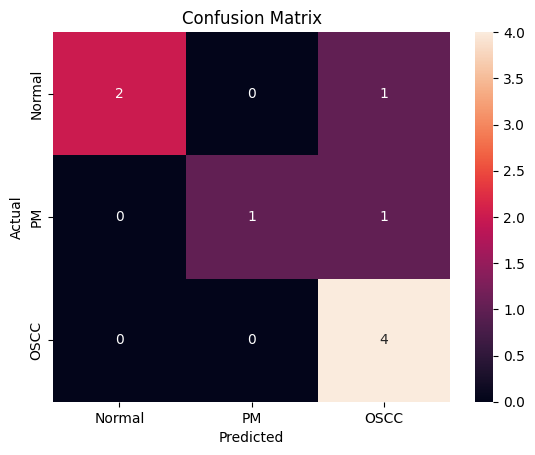

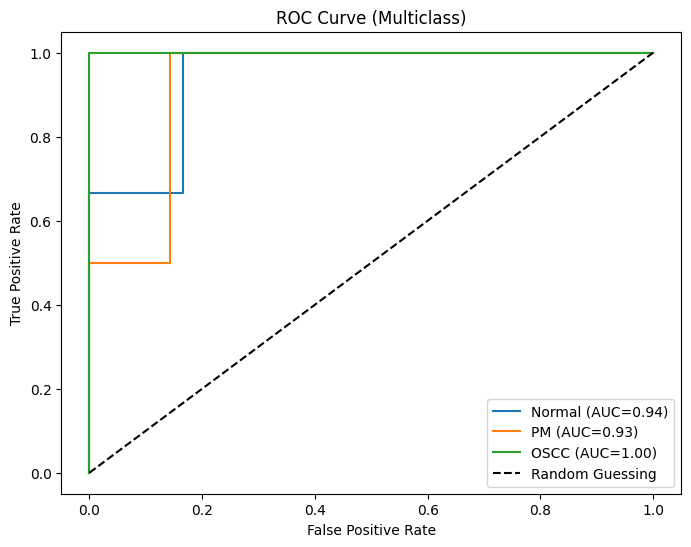

Macro AUC: 0.96
Weighted AUC: 0.97


In [12]:
# Step 1: Define the initial model
logreg = LogisticRegression(multi_class='multinomial', solver='saga',
                            penalty='elasticnet', l1_ratio=0.5, random_state=42, max_iter=1000)

# Step 2: Train the model
logreg.fit(X_train, y_train)

# Step 3: Get feature importances (coefficients)
feature_importances = abs(logreg.coef_).mean(axis=0) 
features_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Step 4: Select the top 25 features
selected_features_logreg = features_df.head(25)['Feature'].tolist()
print(f"Top 25 Features: {selected_features_logreg}")

# Step 5: Create a reduced dataset with top 25 features
X_train_selected = X_train[selected_features_logreg]
X_test_selected = X_test[selected_features_logreg]

# Step 6: Retrain the model with the reduced dataset
logreg_retrained = LogisticRegression(multi_class='multinomial', solver='saga',
                                      penalty='elasticnet', l1_ratio=0.5, random_state=42, max_iter=1000)
logreg_retrained.fit(X_train_selected, y_train)

# Step 7: Make predictions
y_pred = logreg_retrained.predict(X_test_selected)
y_pred_prob = logreg_retrained.predict_proba(X_test_selected)

# Step 8: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[
            'Normal', 'PM', 'OSCC'], yticklabels=[
            'Normal', 'PM', 'OSCC'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Multiclass AUC
y_test_binarized = label_binarize(y_test, classes=[-1, 0, 1]) 
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

class_labels=['Normal', 'PM', 'OSCC']
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend()
plt.show()

# Overall AUC
macro_auc = roc_auc_score(y_test_binarized, y_pred_prob, average="macro")
weighted_auc = roc_auc_score(y_test_binarized, y_pred_prob, average="weighted")
print(f"Macro AUC: {macro_auc:.2f}")
print(f"Weighted AUC: {weighted_auc:.2f}")

#### `Random Forest Model`

Top 25 Features: ['MB_731', 'MB_428', 'MB_468', 'MB_423', 'MB_171', 'MB_355', 'MB_1103', 'MB_1007', 'MB_653', 'MB_692', 'MB_1372', 'MB_864', 'MB_548', 'MB_536', 'MB_637', 'MB_418', 'MB_185', 'MB_1376', 'MB_17', 'MB_782', 'MB_16', 'MB_926', 'MB_783', 'MB_904', 'MB_1213']
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.67      0.80         3
           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         4

    accuracy                           0.78         9
   macro avg       0.89      0.72      0.76         9
weighted avg       0.85      0.78      0.77         9



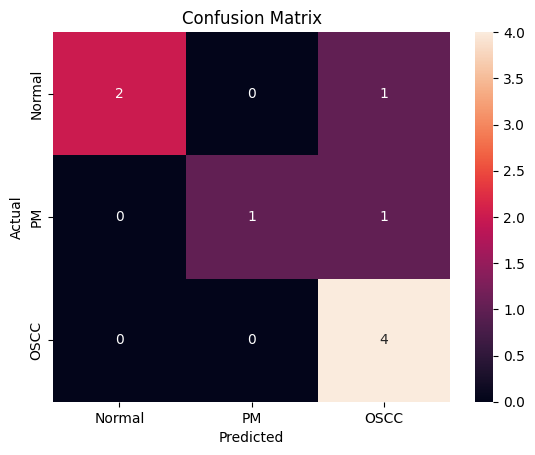

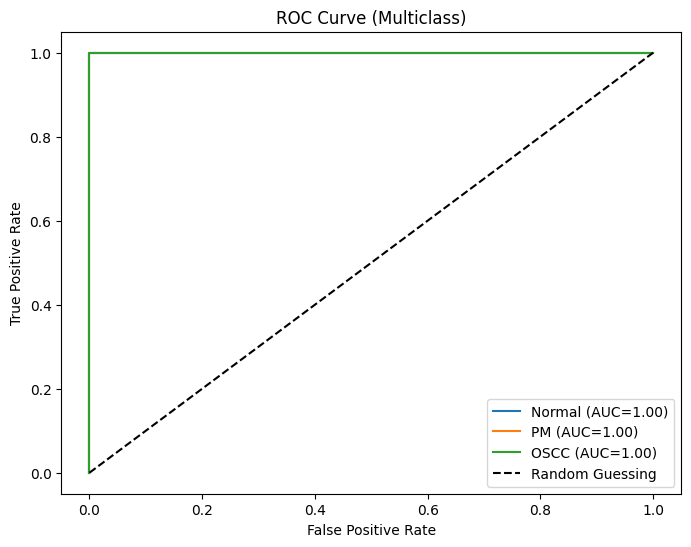

Macro AUC: 1.00
Weighted AUC: 1.00


In [13]:
# Step 1: Train Random Forest to get feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Get feature importances
importances = rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 3: Select the top 25 features
selected_features_rf_op = features_df.head(25)['Feature'].tolist()
print(f"Top 25 Features: {selected_features_rf_op}")

X_train_selected = X_train[selected_features_rf_op]
X_test_selected = X_test[selected_features_rf_op]

# Step 4: Retrain Random Forest with top 25 features
rf_retrained = RandomForestClassifier(n_estimators=100, random_state=42)
rf_retrained.fit(X_train_selected, y_train)
y_pred = rf_retrained.predict(X_test_selected)
y_pred_prob = rf_retrained.predict_proba(X_test_selected)

# Step 5: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[
            'Normal', 'PM', 'OSCC'], yticklabels=['Normal', 'PM', 'OSCC'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Multiclass ROC Curve
y_test_binarized = label_binarize(y_test, classes=[-1, 0, 1])  # Ensure class labels match
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

class_labels = ['Normal', 'PM', 'OSCC']
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend()
plt.show()

# Step 7: Overall AUC Scores
macro_auc = roc_auc_score(y_test_binarized, y_pred_prob, average="macro")
weighted_auc = roc_auc_score(y_test_binarized, y_pred_prob, average="weighted")
print(f"Macro AUC: {macro_auc:.2f}")
print(f"Weighted AUC: {weighted_auc:.2f}")

#### ```SVM model with L1 regularization```<br>
##### We will find the top features as per L1 regularization.

Selected Features: ['MB_16', 'MB_22', 'MB_62', 'MB_63', 'MB_179', 'MB_203', 'MB_355', 'MB_417', 'MB_428', 'MB_437', 'MB_456', 'MB_468', 'MB_476', 'MB_562', 'MB_636', 'MB_658', 'MB_674', 'MB_731', 'MB_783', 'MB_959', 'MB_1146', 'MB_1213', 'MB_1323', 'MB_1370', 'MB_1372']
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         3
           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4

    accuracy                           0.78         9
   macro avg       0.56      0.67      0.60         9
weighted avg       0.63      0.78      0.69         9



c:\Users\soumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\soumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\soumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:

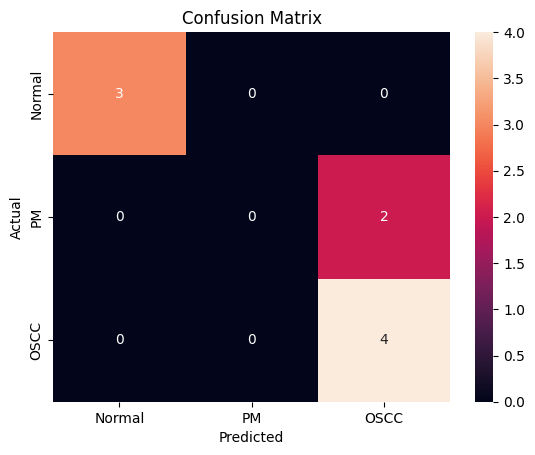

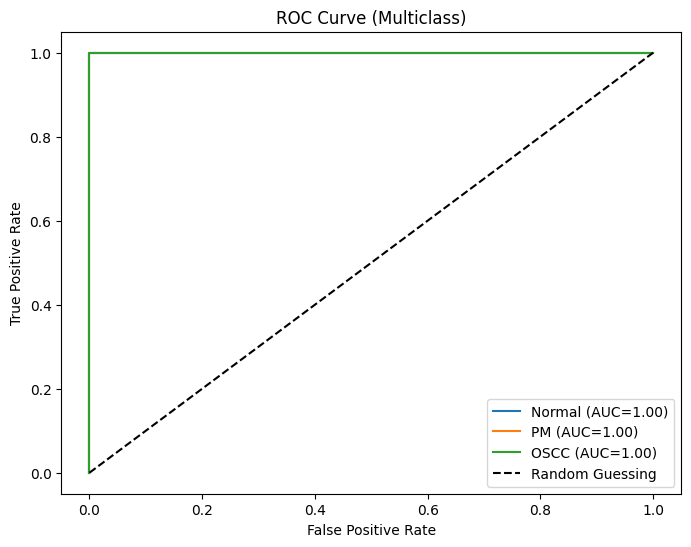

Macro AUC: 1.00
Weighted AUC: 1.00


In [14]:
# Step 1: Train LinearSVC to get feature importances
svc = LinearSVC(penalty='l1', dual=False, C=1.0, random_state=42, max_iter=1000)
svc.fit(X_train, y_train)

# Step 2: Get feature importances (non-zero coefficients)
sfm = SelectFromModel(svc, max_features=25, prefit=True)
selected_features = sfm.get_support(indices=True)
selected_features_svm_l1 = X_train.columns[selected_features]
print(f"Selected Features: {list(selected_features_svm_l1)}")

# Step 3: Create datasets with selected features
X_train_selected = X_train[selected_features_svm_l1]
X_test_selected = X_test[selected_features_svm_l1]

# Step 4: Retrain the model on selected features
svc_retrained = LinearSVC(penalty='l1', dual=False, C=1.0, random_state=42, max_iter=1000)
svc_retrained.fit(X_train_selected, y_train)

# Step 5: Evaluate Model Performance
y_pred = svc_retrained.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[
            'Normal', 'PM', 'OSCC'], yticklabels=['Normal', 'PM', 'OSCC'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Multiclass ROC Curve
y_test_binarized = label_binarize(y_test, classes=[-1, 0, 1])
y_pred_decision = svc_retrained.decision_function(X_test_selected)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_decision[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_decision[:, i])

class_labels = ['Normal', 'PM', 'OSCC']
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend()
plt.show()

# Step 8: Overall AUC Scores
macro_auc = roc_auc_score(y_test_binarized, y_pred_decision, average="macro")
weighted_auc = roc_auc_score(y_test_binarized, y_pred_decision, average="weighted")
print(f"Macro AUC: {macro_auc:.2f}")
print(f"Weighted AUC: {weighted_auc:.2f}")

#### ```SVM model with Recursive Feature Elimination``` <br>
##### Using this we will find the top 25 features.

Selected Features: ['MB_16', 'MB_22', 'MB_27', 'MB_63', 'MB_171', 'MB_179', 'MB_203', 'MB_369', 'MB_428', 'MB_437', 'MB_456', 'MB_545', 'MB_607', 'MB_636', 'MB_658', 'MB_671', 'MB_674', 'MB_731', 'MB_769', 'MB_783', 'MB_904', 'MB_1141', 'MB_1146', 'MB_1213', 'MB_1370']
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.67      0.80         3
           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         4

    accuracy                           0.78         9
   macro avg       0.89      0.72      0.76         9
weighted avg       0.85      0.78      0.77         9



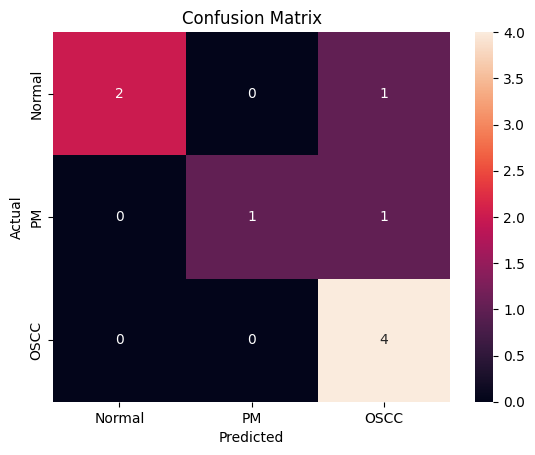

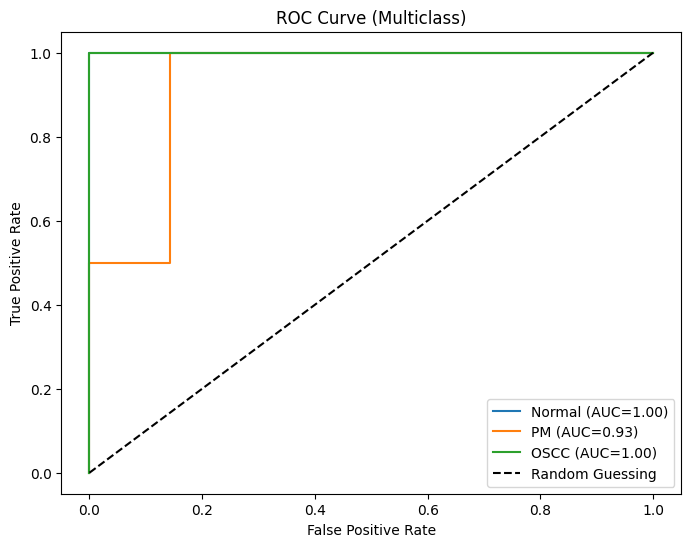

Macro AUC: 0.98
Weighted AUC: 0.98


In [15]:
# Step 1: Train SVM with RBF kernel and perform RFE
svc = SVC(kernel='linear', probability=True, random_state=42)  # Use linear kernel for interpretability
rfe = RFE(estimator=svc, n_features_to_select=25, step=1)  # Select top 25 features
rfe.fit(X_train, y_train)

# Step 2: Get selected features
selected_features_svm_rfe = X_train.columns[rfe.support_]
print(f"Selected Features: {list(selected_features_svm_rfe)}")

# Step 3: Create reduced datasets
X_train_selected = X_train[selected_features_svm_rfe]
X_test_selected = X_test[selected_features_svm_rfe]

# Step 4: Retrain the SVM model on selected features
svc_retrained = SVC(kernel='linear', probability=True, random_state=42)
svc_retrained.fit(X_train_selected, y_train)

# Step 5: Make predictions
y_pred = svc_retrained.predict(X_test_selected)
y_pred_prob = svc_retrained.predict_proba(X_test_selected)

# Step 6: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=[
            'Normal', 'PM', 'OSCC'], yticklabels=['Normal', 'PM', 'OSCC'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Multiclass ROC Curve
y_test_binarized = label_binarize(y_test, classes=[-1, 0, 1])
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

class_labels = ['Normal', 'PM', 'OSCC']
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend()
plt.show()

# Step 9: Overall AUC Scores
macro_auc = roc_auc_score(y_test_binarized, y_pred_prob, average="macro")
weighted_auc = roc_auc_score(y_test_binarized, y_pred_prob, average="weighted")
print(f"Macro AUC: {macro_auc:.2f}")
print(f"Weighted AUC: {weighted_auc:.2f}")

#### `Results`

In [16]:
# Convert Series to lists
selected_features_svm_l1 = selected_features_svm_l1.tolist()
selected_features_svm_rfe = selected_features_svm_rfe.tolist()

# Find the maximum length of the arrays
max_length = max(len(selected_features_logreg), len(selected_features_rf_op), len(selected_features_svm_l1), len(selected_features_svm_rfe))

# Pad the arrays with None to make them the same length
selected_features_logreg += [None] * (max_length - len(selected_features_logreg))
selected_features_rf_op += [None] * (max_length - len(selected_features_rf_op))
selected_features_svm_l1 += [None] * (max_length - len(selected_features_svm_l1))
selected_features_svm_rfe += [None] * (max_length - len(selected_features_svm_rfe))

# Create the DataFrame
selected_features = pd.DataFrame({
    'Logistic Regression': selected_features_logreg,
    'Random Forest': selected_features_rf_op,
    'SVM L1': selected_features_svm_l1,
    'SVM RFE': selected_features_svm_rfe
})

# Save to Excel
selected_features.to_excel('../results/selected_features_3groups_negative.xlsx', index=False)